In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.impute import SimpleImputer

In [3]:
path = '/Users/desislavamarvakov/Study/HIT/שנה ב׳/סמסטר ב׳/Data Science/Final Project/Code/clean_outcome.csv'
clean_df = pd.read_csv(path)
clean_df.head()

,Unnamed: 0,Animal ID,Name,DateTime,Outcome Type,Animal Type,Sex upon Outcome,Age_upon_Outcome_years,Breed,Color,DayOfWeek,Month,year
0,0,A794011,1,2019-05-08 18:20:00,Rto-Adopt,Cat,Neutered Male,2.000000,Mix,Mix,2,5,2019
1,1,A776359,1,2018-07-18 16:02:00,Adoption,Dog,Neutered Male,1.000000,Mix,Mix,2,7,2018
2,2,A821648,0,2020-08-16 11:38:00,Euthanasia,Other,Unknown,1.000000,Pure,Pure,6,8,2020
3,3,A720371,1,2016-02-13 17:59:00,Adoption,Dog,Neutered Male,0.333333,Mix,Pure,5,2,2016
4,4,A674754,0,2014-03-18 11:47:00,Transfer,Cat,Intact Male,0.016438,Mix,Pure,1,3,2014


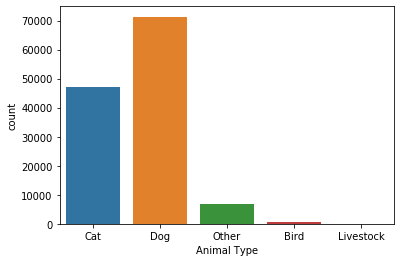

In [3]:
sns.countplot(x="Animal Type", data=clean_df)

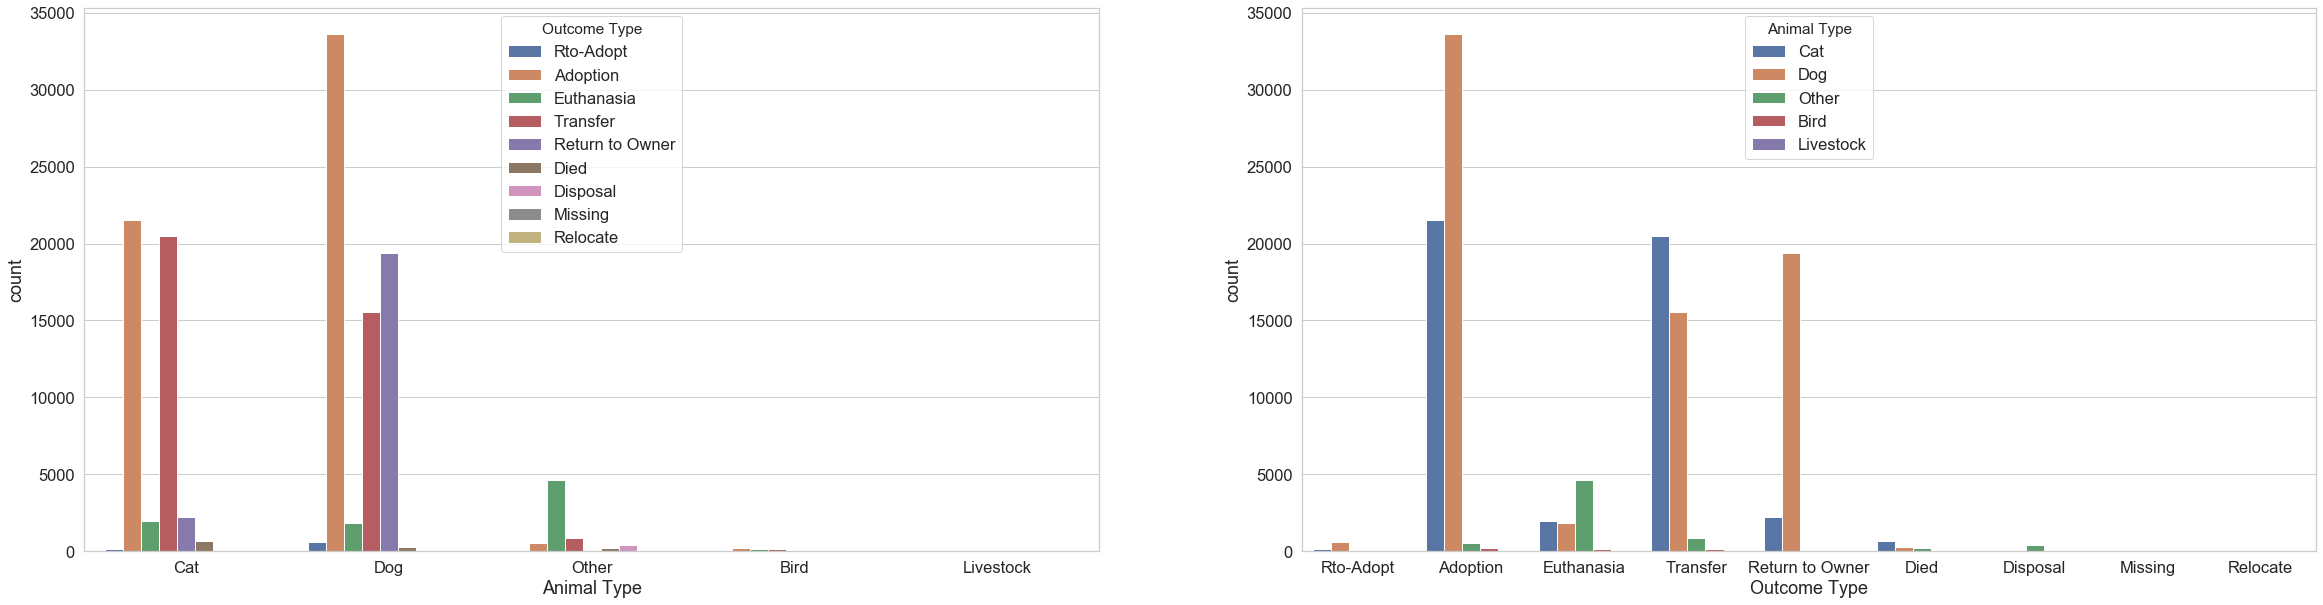

In [4]:
sns.set(style="whitegrid",font_scale=1.5)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 10))
sns.countplot(data=clean_df, x='Animal Type',hue='Outcome Type', ax=ax1)
sns.countplot(data=clean_df, x='Outcome Type',hue='Animal Type', ax=ax2)
#plt.legend(legend, loc= 'upper right')
#plt.xlabel('Animal Type', fontsize= 20)


In [5]:
clean_df = clean_df[clean_df['Animal Type'] != 'Livestock']
clean_df = clean_df[clean_df['Animal Type'] != 'Bird']
clean_df = clean_df[clean_df['Animal Type'] != 'Other']

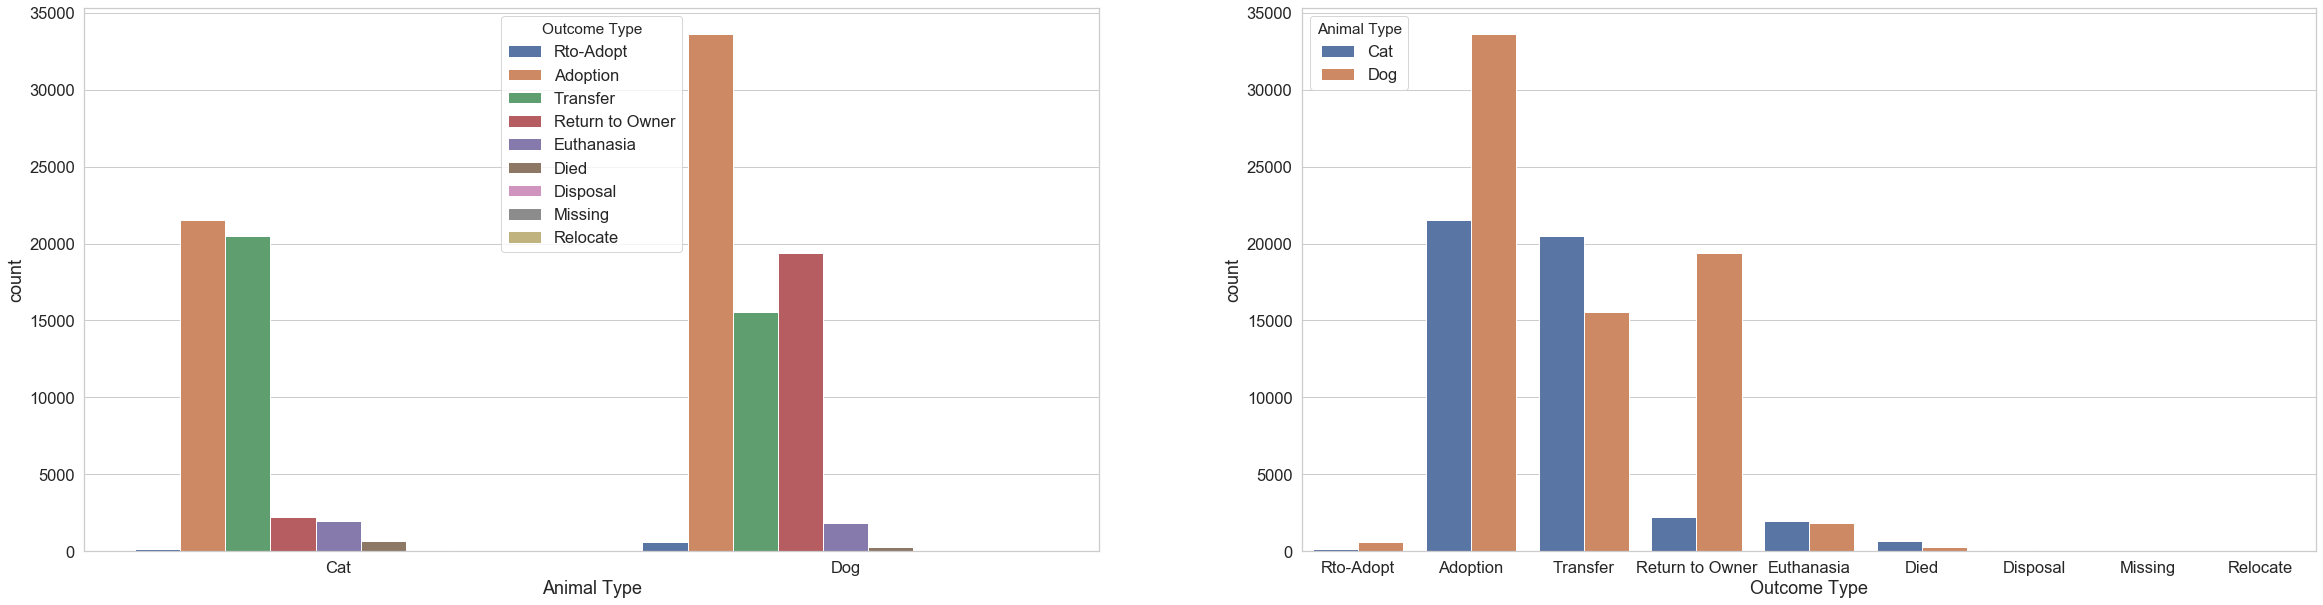

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 10))
sns.countplot(data=clean_df, x='Animal Type',hue='Outcome Type', ax=ax1)
sns.countplot(data=clean_df, x='Outcome Type',hue='Animal Type', ax=ax2)

In [7]:
#Checking again for duplicates (even though the data used here is cleaned)
print('There are {} duplicated rows'.format(clean_df.duplicated().sum()))

There are 0 duplicated rows


In [8]:
df = clean_df.copy()
df.Name.value_counts()

1    85494
0    33018
Name: Name, dtype: int64

In [9]:
#df['Age upon Outcome'].isnull().sum()

In [10]:
df['Sex upon Outcome'].isnull().sum()


2

In [11]:
#Imputation transformer for completing missing values.
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

# cols_for_filing = ["Sex upon Outcome", "Age_upon_Outcome_Days"]
# imputer_na = SimpleImputer(strategy="most_frequent")

# df.loc[:, cols_for_filing] = imputer_na.fit_transform(df.loc[:, cols_for_filing])

At first we thought to fill the null fields but then decided we should just drop them (due to low amount of null)

In [12]:
df.dropna(how = 'any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118486 entries, 0 to 125891
Data columns (total 13 columns):
Unnamed: 0                118486 non-null int64
Animal ID                 118486 non-null object
Name                      118486 non-null int64
DateTime                  118486 non-null object
Outcome Type              118486 non-null object
Animal Type               118486 non-null object
Sex upon Outcome          118486 non-null object
Age_upon_Outcome_years    118486 non-null float64
Breed                     118486 non-null object
Color                     118486 non-null object
DayOfWeek                 118486 non-null int64
Month                     118486 non-null int64
year                      118486 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 12.7+ MB


In [14]:
def age_group(age):
    if age < 1: group = 'puppy_kitten'
    elif age < 3: group = 'young'
    elif age < 6: group = 'adult'
    else: group = 'old'
    return group

In [15]:
df['Outcome Type'].value_counts()

Adoption           55201
Transfer           36054
Return to Owner    21610
Euthanasia          3770
Died                 953
Rto-Adopt            716
Disposal             115
Missing               65
Relocate               2
Name: Outcome Type, dtype: int64

In [17]:
df['Age Group'] = df['Age_upon_Outcome_years'].apply(age_group)

In [18]:
df.head()

,Unnamed: 0,Animal ID,Name,DateTime,Outcome Type,Animal Type,Sex upon Outcome,Age_upon_Outcome_years,Breed,Color,DayOfWeek,Month,year,Age Group
0,0,A794011,1,2019-05-08 18:20:00,Rto-Adopt,Cat,Neutered Male,2.000000,Mix,Mix,2,5,2019,young
1,1,A776359,1,2018-07-18 16:02:00,Adoption,Dog,Neutered Male,1.000000,Mix,Mix,2,7,2018,young
3,3,A720371,1,2016-02-13 17:59:00,Adoption,Dog,Neutered Male,0.333333,Mix,Pure,5,2,2016,puppy_kitten
4,4,A674754,0,2014-03-18 11:47:00,Transfer,Cat,Intact Male,0.016438,Mix,Pure,1,3,2014,puppy_kitten
5,5,A659412,1,2020-10-05 14:37:00,Adoption,Dog,Spayed Female,7.000000,Mix,Pure,0,10,2020,old


In [19]:
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
# sns.countplot(data=df, x='Age Group',hue='Outcome Type', ax=ax1)
# sns.countplot(data=df, x='Outcome Type',hue='Age Group', ax=ax2)

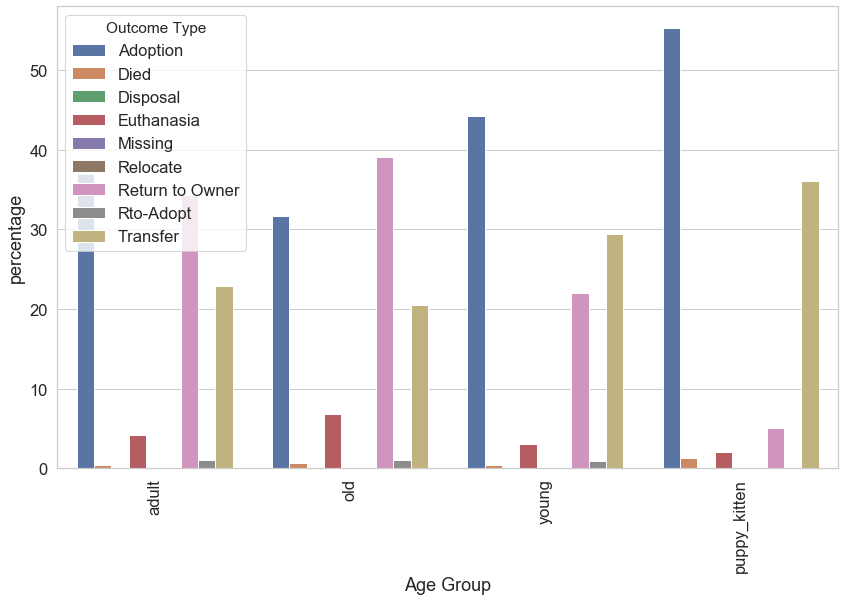

In [20]:
fig_dims = (14, 8.5)
fig, ax = plt.subplots(figsize=fig_dims)
occupation_counts = (df.groupby(['Age Group'])['Outcome Type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Outcome Type'))
p = sns.barplot(x="Age Group", y="percentage", hue="Outcome Type", data=occupation_counts, ax=ax)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

In [21]:
df = pd.get_dummies(df, columns=['Animal Type', 'Sex upon Outcome', 'Breed', 'Color','Age Group'])
df


,Unnamed: 0,Animal ID,Name,DateTime,Outcome Type,Age_upon_Outcome_years,DayOfWeek,Month,year,Animal Type_Cat,...,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Breed_Mix,Breed_Pure,Color_Mix,Color_Pure,Age Group_adult,Age Group_old,Age Group_puppy_kitten,Age Group_young
0,0,A794011,1,2019-05-08 18:20:00,Rto-Adopt,2.000000,2,5,2019,1,...,0,0,1,0,1,0,0,0,0,1
1,1,A776359,1,2018-07-18 16:02:00,Adoption,1.000000,2,7,2018,0,...,0,0,1,0,1,0,0,0,0,1
3,3,A720371,1,2016-02-13 17:59:00,Adoption,0.333333,5,2,2016,0,...,0,0,1,0,0,1,0,0,1,0
4,4,A674754,0,2014-03-18 11:47:00,Transfer,0.016438,1,3,2014,1,...,0,0,1,0,0,1,0,0,1,0
5,5,A659412,1,2020-10-05 14:37:00,Adoption,7.000000,0,10,2020,0,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125887,125903,A832672,1,2021-05-02 15:35:00,Transfer,5.000000,6,5,2021,0,...,1,0,1,0,0,1,1,0,0,0
125888,125904,A830970,1,2021-05-02 15:11:00,Adoption,14.000000,6,5,2021,0,...,0,0,0,1,0,1,0,1,0,0
125889,125905,A832671,1,2021-05-02 15:35:00,Transfer,8.000000,6,5,2021,0,...,1,0,0,1,0,1,0,1,0,0
125890,125906,A832788,1,2021-05-02 15:56:00,Adoption,2.000000,6,5,2021,0,...,0,0,1,0,1,0,0,0,0,1


In [22]:
TRAINING_FEATURES = df[df.columns.difference(["Animal ID", "Outcome Type", "Outcome Subtype", "Name", "DateTime"])]

TARGET_FEATURE    = 'Outcome Type'

X = TRAINING_FEATURES
y = df[TARGET_FEATURE]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train

,Age Group_adult,Age Group_old,Age Group_puppy_kitten,Age Group_young,Age_upon_Outcome_years,Animal Type_Cat,Animal Type_Dog,Breed_Mix,Breed_Pure,Color_Mix,Color_Pure,DayOfWeek,Month,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Unnamed: 0,year
29282,0,0,1,0,0.016438,1,0,1,0,1,0,3,3,0,1,0,0,0,29285,2017
60781,0,0,0,1,1.000000,0,1,1,0,1,0,6,2,0,0,1,0,0,60787,2015
2969,0,0,1,0,0.166667,1,0,1,0,0,1,4,9,0,0,0,1,0,2969,2014
81205,0,1,0,0,8.000000,1,0,1,0,0,1,5,1,0,0,1,0,0,81214,2015
72785,1,0,0,0,4.000000,0,1,1,0,0,1,5,11,0,0,1,0,0,72793,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53455,0,1,0,0,8.000000,1,0,1,0,1,0,5,2,0,0,1,0,0,53460,2018
76325,1,0,0,0,5.000000,0,1,1,0,1,0,6,12,0,0,1,0,0,76333,2018
81301,0,0,1,0,0.333333,0,1,0,1,1,0,1,5,0,0,0,1,0,81310,2014
4266,0,0,1,0,0.333333,1,0,1,0,0,1,2,9,0,0,1,0,0,4266,2018


In [24]:
print(f"Number of Rows, Features in Training Dataset: {X_train.shape}")
print(f"Number of Rows, Features in Test Dataset: {X_test.shape}")

print(f"Number of Rows in Training Response: {y_train.shape}")
print(f"Number of Rows in Test Response: {y_test.shape}")

Number of Rows, Features in Training Dataset: (88864, 20)
Number of Rows, Features in Test Dataset: (29622, 20)
Number of Rows in Training Response: (88864,)
Number of Rows in Test Response: (29622,)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
lr = LogisticRegression()

# Get accuracy using train set
lr.fit(X_train, y_train)

print(lr.classes_)
print(f"LogisticRegression Accuracy train Score: {lr.score(X_train, y_train)}")

# Get accuracy using test set
y_pred = lr.predict(X_test)

print(f"LogisticRegression Accuracy test Score: {np.mean(y_pred == y_test)}")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['Adoption' 'Died' 'Disposal' 'Euthanasia' 'Missing' 'Relocate'
 'Return to Owner' 'Rto-Adopt' 'Transfer']
LogisticRegression Accuracy train Score: 0.585276377385668
LogisticRegression Accuracy test Score: 0.5825400040510431
